# Fall 2021 Midterm Project
## IOWA Housing Dataset
### Shivam Shrivastav
### SJSU ID: 015275000

Main Dataset Link: https://drive.google.com/drive/u/4/folders/1o8xOlyoERxwW1j60WHRp7yLflHcC2O3A  
IOWA Dataset Link: https://drive.google.com/file/d/1h6jeu_81VLLa3qXSyzmlUw_ub6ia8Q2E/view?usp=sharing    
Scrapped Dataset: https://drive.google.com/file/d/1pFhkGNJbM1Eah3qxyZDZvUTUprYXf_Va/view?usp=sharing

# Rubric Coverage: 

Business case and value - what hypotheses are we trying to prove?  
***Business Case***   
1. Provide knowledge to an investor or buyers, whether to invest in a housing porperty or not.   
2.  This decison has to be taken by considering various features such as, Selling Price of the property, Zestimate Price, Proximity Ranking to various Schools, Crime Rate in the area, Walk Score etc.


***Data narrative***:
Using IOWA Dataset given by the professor, I performed Data cleaning, data preparation and eliminated unwanted columns and considered only the required features such as, address, zipcode, area, bedrooms, bathrooms, year built, price, zesitmate, zestimate rent.   
Apart from this data, I scrapped serveral addtional dataset from above mentioned websites to enrich the intial dataset, amalgamate it and improve the feature set and visualization of deduce the best model.

***Visualizations*** of data preparation using First, Second and Third Data Enrichment.     


Calculate Feature importance, gini score.   
***Data Preparaion***    
Feature transformation: Transform features  and add new features to dataset via amalgamations   


***Data distribution***
Dimensionality Reduction via PCA      
Implement 3 amalgamations:    
First dataset Enrichment     
Second data Enrichment    
Third data enrichment    


***Implement different ML Algorithms*** to build models and refine data narrative.   


***Define a Golden cluster and use Fractal Clustering*** to find it based on the business case.   


***Train and Apply algorithms using Muller loop for***   
***Classifier:***   
"Nearest Neighbors",   
"Linear SVM",   
"RBF SVM",   
"Decision Tree",   
"Random Forest",  
"Neural Net",  
"AdaBoost",  
"Naive Bayes",  
"QDA" 

***Regression:***   
"GradientBoostingRegressor",  
"RandomForestRegressor",  
"LinearRegression",  
"SVR",  
"DecisionTreeRegressor",  
"AdaBoostRegressor",  
"GaussianProcessRegressor",  
"LogisticRegressor"  


***Compare relevant tasks in the same table***   
Interpret results of each algorithm.    
Suggest Latent Variables or Latent Manifolds, add then to the features and see how prediction results change.   
Use appropriate metrics for measuring models and compare them in a table:      regression metrics and/or classification metrics (confusion matrix, F1 and R2 score).   

***Install additional dlibraries***

In [4]:
!pip install xgboost

In [5]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.4 MB/s 


In [6]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 6.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
from sklearn import preprocessing
import seaborn as seabornInstance 
from sklearn.preprocessing import LabelEncoder, RobustScaler
import pickle

import requests
from bs4 import BeautifulSoup
import json
import time
import csv

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
%matplotlib inline
%load_ext google.colab.data_table

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve

import seaborn as sns; sns.set()
from skopt import BayesSearchCV
import mlxtend.evaluate
from mlxtend.evaluate import bias_variance_decomp
CV_N_REPEATS = 20
BINS = 10


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [8]:
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns; sns.set()
from skopt import BayesSearchCV
import mlxtend.evaluate
from mlxtend.evaluate import bias_variance_decomp
CV_N_REPEATS = 20
BINS = 10

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
cd 'gdrive/MyDrive'

/content/gdrive/MyDrive


***Read Main Dataset filtered on IOWA State Data***

In [11]:
df = pd.read_csv('Shivam_IA_Dataset_Realestate.csv')
df.head(5)

rank  ...                               listing_url
0  532   ...  https://www.zillow.com/homes/IA_rb/14_p/
1  51    ...  https://www.zillow.com/homes/IA_rb/2_p/ 
2  231   ...  https://www.zillow.com/homes/IA_rb/6_p/ 
3  796   ...  https://www.zillow.com/homes/IA_rb/20_p/
4  429   ...  https://www.zillow.com/homes/IA_rb/11_p/

[5 rows x 22 columns]

In [13]:
#print info
df.head(2)
print(df.shape)
print(df.info())

(757, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             757 non-null    int64  
 1   property_id      757 non-null    int64  
 2   address          757 non-null    object 
 3   latitude         730 non-null    float64
 4   longitude        730 non-null    float64
 5   price            746 non-null    float64
 6   currency         757 non-null    object 
 7   bathrooms        663 non-null    float64
 8   bedrooms         713 non-null    float64
 9   area             670 non-null    object 
 10  land_area        90 non-null     object 
 11  zestimate        443 non-null    float64
 12  rent_zestimate   484 non-null    float64
 13  days_on_zillow   756 non-null    float64
 14  sold_date        0 non-null      float64
 15  is_zillow_owned  757 non-null    bool   
 16  image            757 non-null    object 
 17  listin

# ***Data Preparaion, Data Cleaning***

***check features having the null value***

In [14]:
print(df.isnull().sum()) 
print(df.isnull().mean())


def find_irrelevant_cols(data):
    col_null_sum = df.isnull().sum().to_list()
    df.isnull().mean()
    for (i,j) in col_null_mean:
        if j > 0.7:
          print(i)

rank               0  
property_id        0  
address            0  
latitude           27 
longitude          27 
price              11 
currency           0  
bathrooms          94 
bedrooms           44 
area               87 
land_area          667
zestimate          314
rent_zestimate     273
days_on_zillow     1  
sold_date          757
is_zillow_owned    0  
image              0  
listing_type       0  
broker_name        133
input              0  
property_url       0  
listing_url        0  
dtype: int64
rank               0.000000
property_id        0.000000
address            0.000000
latitude           0.035667
longitude          0.035667
price              0.014531
currency           0.000000
bathrooms          0.124174
bedrooms           0.058124
area               0.114927
land_area          0.881110
zestimate          0.414795
rent_zestimate     0.360634
days_on_zillow     0.001321
sold_date          1.000000
is_zillow_owned    0.000000
image              0.000000
listi

In [15]:
df.drop(['currency','property_id', 'rank','land_area', 'sold_date', 'days_on_zillow', 'broker_name', 'image', 'is_zillow_owned'], axis=1, inplace=True)
df.shape

(757, 13)

***Drop the rows with null values***

In [16]:
[df['latitude'][df["latitude"].isnull()!=0].index]
df = df.dropna(subset=['latitude','longitude', 'price', 'bedrooms', 'area', 'bathrooms'])
df.shape

(641, 13)

***Get zipcodes from address***

In [17]:

df['address'].apply(lambda x:x[-5:])
df['zipcode']=df['address'].apply(lambda x:x[-5:])

In [18]:
len(df['zipcode'].unique())

228

In [19]:
df['area'] = df['area'].apply(lambda a: (str(a).replace("sqft", ""))).astype(float)

***Use price as zestimate for listings not showing zestimate price***

In [20]:
df.zestimate.fillna(df.price, inplace=True)

In [21]:
df.isnull().sum()

address           0  
latitude          0  
longitude         0  
price             0  
bathrooms         0  
bedrooms          0  
area              0  
zestimate         0  
rent_zestimate    168
listing_type      0  
input             0  
property_url      0  
listing_url       0  
zipcode           0  
dtype: int64

In [22]:
df['rent_zestimate'].fillna((df['rent_zestimate'].mean()), inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 756
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         641 non-null    object 
 1   latitude        641 non-null    float64
 2   longitude       641 non-null    float64
 3   price           641 non-null    float64
 4   bathrooms       641 non-null    float64
 5   bedrooms        641 non-null    float64
 6   area            641 non-null    float64
 7   zestimate       641 non-null    float64
 8   rent_zestimate  641 non-null    float64
 9   listing_type    641 non-null    object 
 10  input           641 non-null    object 
 11  property_url    641 non-null    object 
 12  listing_url     641 non-null    object 
 13  zipcode         641 non-null    object 
dtypes: float64(8), object(6)
memory usage: 75.1+ KB


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 756
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         641 non-null    object 
 1   latitude        641 non-null    float64
 2   longitude       641 non-null    float64
 3   price           641 non-null    float64
 4   bathrooms       641 non-null    float64
 5   bedrooms        641 non-null    float64
 6   area            641 non-null    float64
 7   zestimate       641 non-null    float64
 8   rent_zestimate  641 non-null    float64
 9   listing_type    641 non-null    object 
 10  input           641 non-null    object 
 11  property_url    641 non-null    object 
 12  listing_url     641 non-null    object 
 13  zipcode         641 non-null    object 
dtypes: float64(8), object(6)
memory usage: 75.1+ KB


#***Data Scrapping*** 
Scrapping is done on another colab notebook. Please find below link to the same 
https://colab.research.google.com/drive/1cXhDZZEZyYocZ9JSSmrTSNXneD-ayaeL

***Final Scrapped Dataset file store in drive is 'shivam_final_scrapped_data.csv'***

Scrapped Dataset: https://drive.google.com/file/d/1pFhkGNJbM1Eah3qxyZDZvUTUprYXf_Va/view?usp=sharing
  
#***Scraping the below websites to get additional information for the IOWA State Housing Dataset for Midterm using beautifulsoup4***


Zillow:  https://www.zillow.com  
Walk Score: https://www.walkscore.com  
School Proximity Rank: https://www.niche.com/places-to-live/z/  
Crime rates: https://247wallst.com/city/  

***Read Scrapped dataset***

In [25]:
df_scrap = pd.read_csv('shivam_final_scraped_data.csv')
df = pd.merge(left=df, right=df_scrap, how='left', left_on='address', right_on='address')
# df = pd.merge(df, df_scrap, left_on='address')
df.head()
df.info() 
# 0   Status                                187 non-null    int64  
#  1   Style                                 187 non-null    int64  
#  2   Zip                                   187 non-null    int64  
#  3   Beds                                  187 non-null    int64  
#  4   TotB                                  187 non-null    int64  
#  5   EstSF                                 187 non-null    object 
#  6   ListPrice                             187 non-null    object 
#  7   Sold Price                            187 non-null    object 
#  8   Zestimate Price                       187 non-null    object 
#  9   Rent                                  187 non-null    object 
#  10  Mortgage+HOA                          187 non-null    object 
#  11  Walk Score                            187 non-null    float64
#  12  SchoolProximityRank                   32 non-null     object 
#  13  Violent crime rateper 1,000 persons   58 non-null     float64
#  14  Property crime rateper 1,000 persons  58 non-null     object
# 'Status','Style','Zip','Beds','TotB','EstSF','ListPrice','Sold Price', 'Zestimate Price', 'Rent', 'Est. Payment', 'Walk Score','SchoolProximityRank','Violent crime rateper 1,000 persons','Property crime rateper 1,000 persons']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      641 non-null    object 
 1   latitude                     641 non-null    float64
 2   longitude                    641 non-null    float64
 3   price                        641 non-null    float64
 4   bathrooms                    641 non-null    float64
 5   bedrooms                     641 non-null    float64
 6   area                         641 non-null    float64
 7   zestimate                    641 non-null    float64
 8   rent_zestimate               641 non-null    float64
 9   listing_type                 641 non-null    object 
 10  input                        641 non-null    object 
 11  property_url                 641 non-null    object 
 12  listing_url                  641 non-null    object 
 13  zipcode             

##***Data cleaning and Amalgamation***

In [26]:
df = df[['zipcode', 'bedrooms', 'bathrooms', 'area', 'price', 'zestimate', 'rent_zestimate', 'HOAHOA', 'Walk Score', 'School Rank', 'Violent Crime', 'Property Crime', 'Mortgage fees per month']]
print(df.isnull().sum()) #features having the null value
print(df.isnull().mean())
def find_irrelevant_cols(df):
  col_null_sum = df.isnull().sum().to_list()
  df.isnull().mean()
  for (i,j) in col_null_mean:
    if j > 0.7:
      print(i)


zipcode                    0  
bedrooms                   0  
bathrooms                  0  
area                       0  
price                      0  
zestimate                  0  
rent_zestimate             0  
HOAHOA                     571
Walk Score                 5  
School Rank                125
Violent Crime              262
Property Crime             262
Mortgage fees per month    62 
dtype: int64
zipcode                    0.000000
bedrooms                   0.000000
bathrooms                  0.000000
area                       0.000000
price                      0.000000
zestimate                  0.000000
rent_zestimate             0.000000
HOAHOA                     0.890796
Walk Score                 0.007800
School Rank                0.195008
Violent Crime              0.408736
Property Crime             0.408736
Mortgage fees per month    0.096724
dtype: float64


In [27]:
df['Walk Score'] = df['Walk Score'].astype(float)
df['zipcode'] = df['zipcode'].astype(float)

df['HOAHOA'].fillna((df['HOAHOA'].mean()), inplace=True)
df['Walk Score'].fillna((df['Walk Score'].mean()), inplace=True)
df['School Rank'].fillna((df['School Rank'].mean()), inplace=True)
df['Violent Crime'].fillna((df['Violent Crime'].mean()), inplace=True)
df['Property Crime'].fillna((df['Property Crime'].mean()), inplace=True)
df['Mortgage fees per month'].fillna((df['Mortgage fees per month'].mean()), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   zipcode                  641 non-null    float64
 1   bedrooms                 641 non-null    float64
 2   bathrooms                641 non-null    float64
 3   area                     641 non-null    float64
 4   price                    641 non-null    float64
 5   zestimate                641 non-null    float64
 6   rent_zestimate           641 non-null    float64
 7   HOAHOA                   641 non-null    float64
 8   Walk Score               641 non-null    float64
 9   School Rank              641 non-null    float64
 10  Violent Crime            641 non-null    float64
 11  Property Crime           641 non-null    float64
 12  Mortgage fees per month  641 non-null    float64
dtypes: float64(13)
memory usage: 70.1 KB


##***Build HOA+Mortgage Fees as these might be the best bet for latent variables***

In [28]:
df['Mortgage+HOA'] = df['Mortgage fees per month']+df['HOAHOA']
df['Profit'] =  df['rent_zestimate'] - df['Mortgage+HOA']
df= df.drop(['HOAHOA','Mortgage fees per month'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         641 non-null    float64
 1   bedrooms        641 non-null    float64
 2   bathrooms       641 non-null    float64
 3   area            641 non-null    float64
 4   price           641 non-null    float64
 5   zestimate       641 non-null    float64
 6   rent_zestimate  641 non-null    float64
 7   Walk Score      641 non-null    float64
 8   School Rank     641 non-null    float64
 9   Violent Crime   641 non-null    float64
 10  Property Crime  641 non-null    float64
 11  Mortgage+HOA    641 non-null    float64
 12  Profit          641 non-null    float64
dtypes: float64(13)
memory usage: 70.1 KB


# Final Dataset after amalgamating and data enrichment :
***(walk score, hoa , school rank, morgage fees , crime rate)*** from webscraping.

In [29]:
final_df = df

# Visualization and Feature Engineering


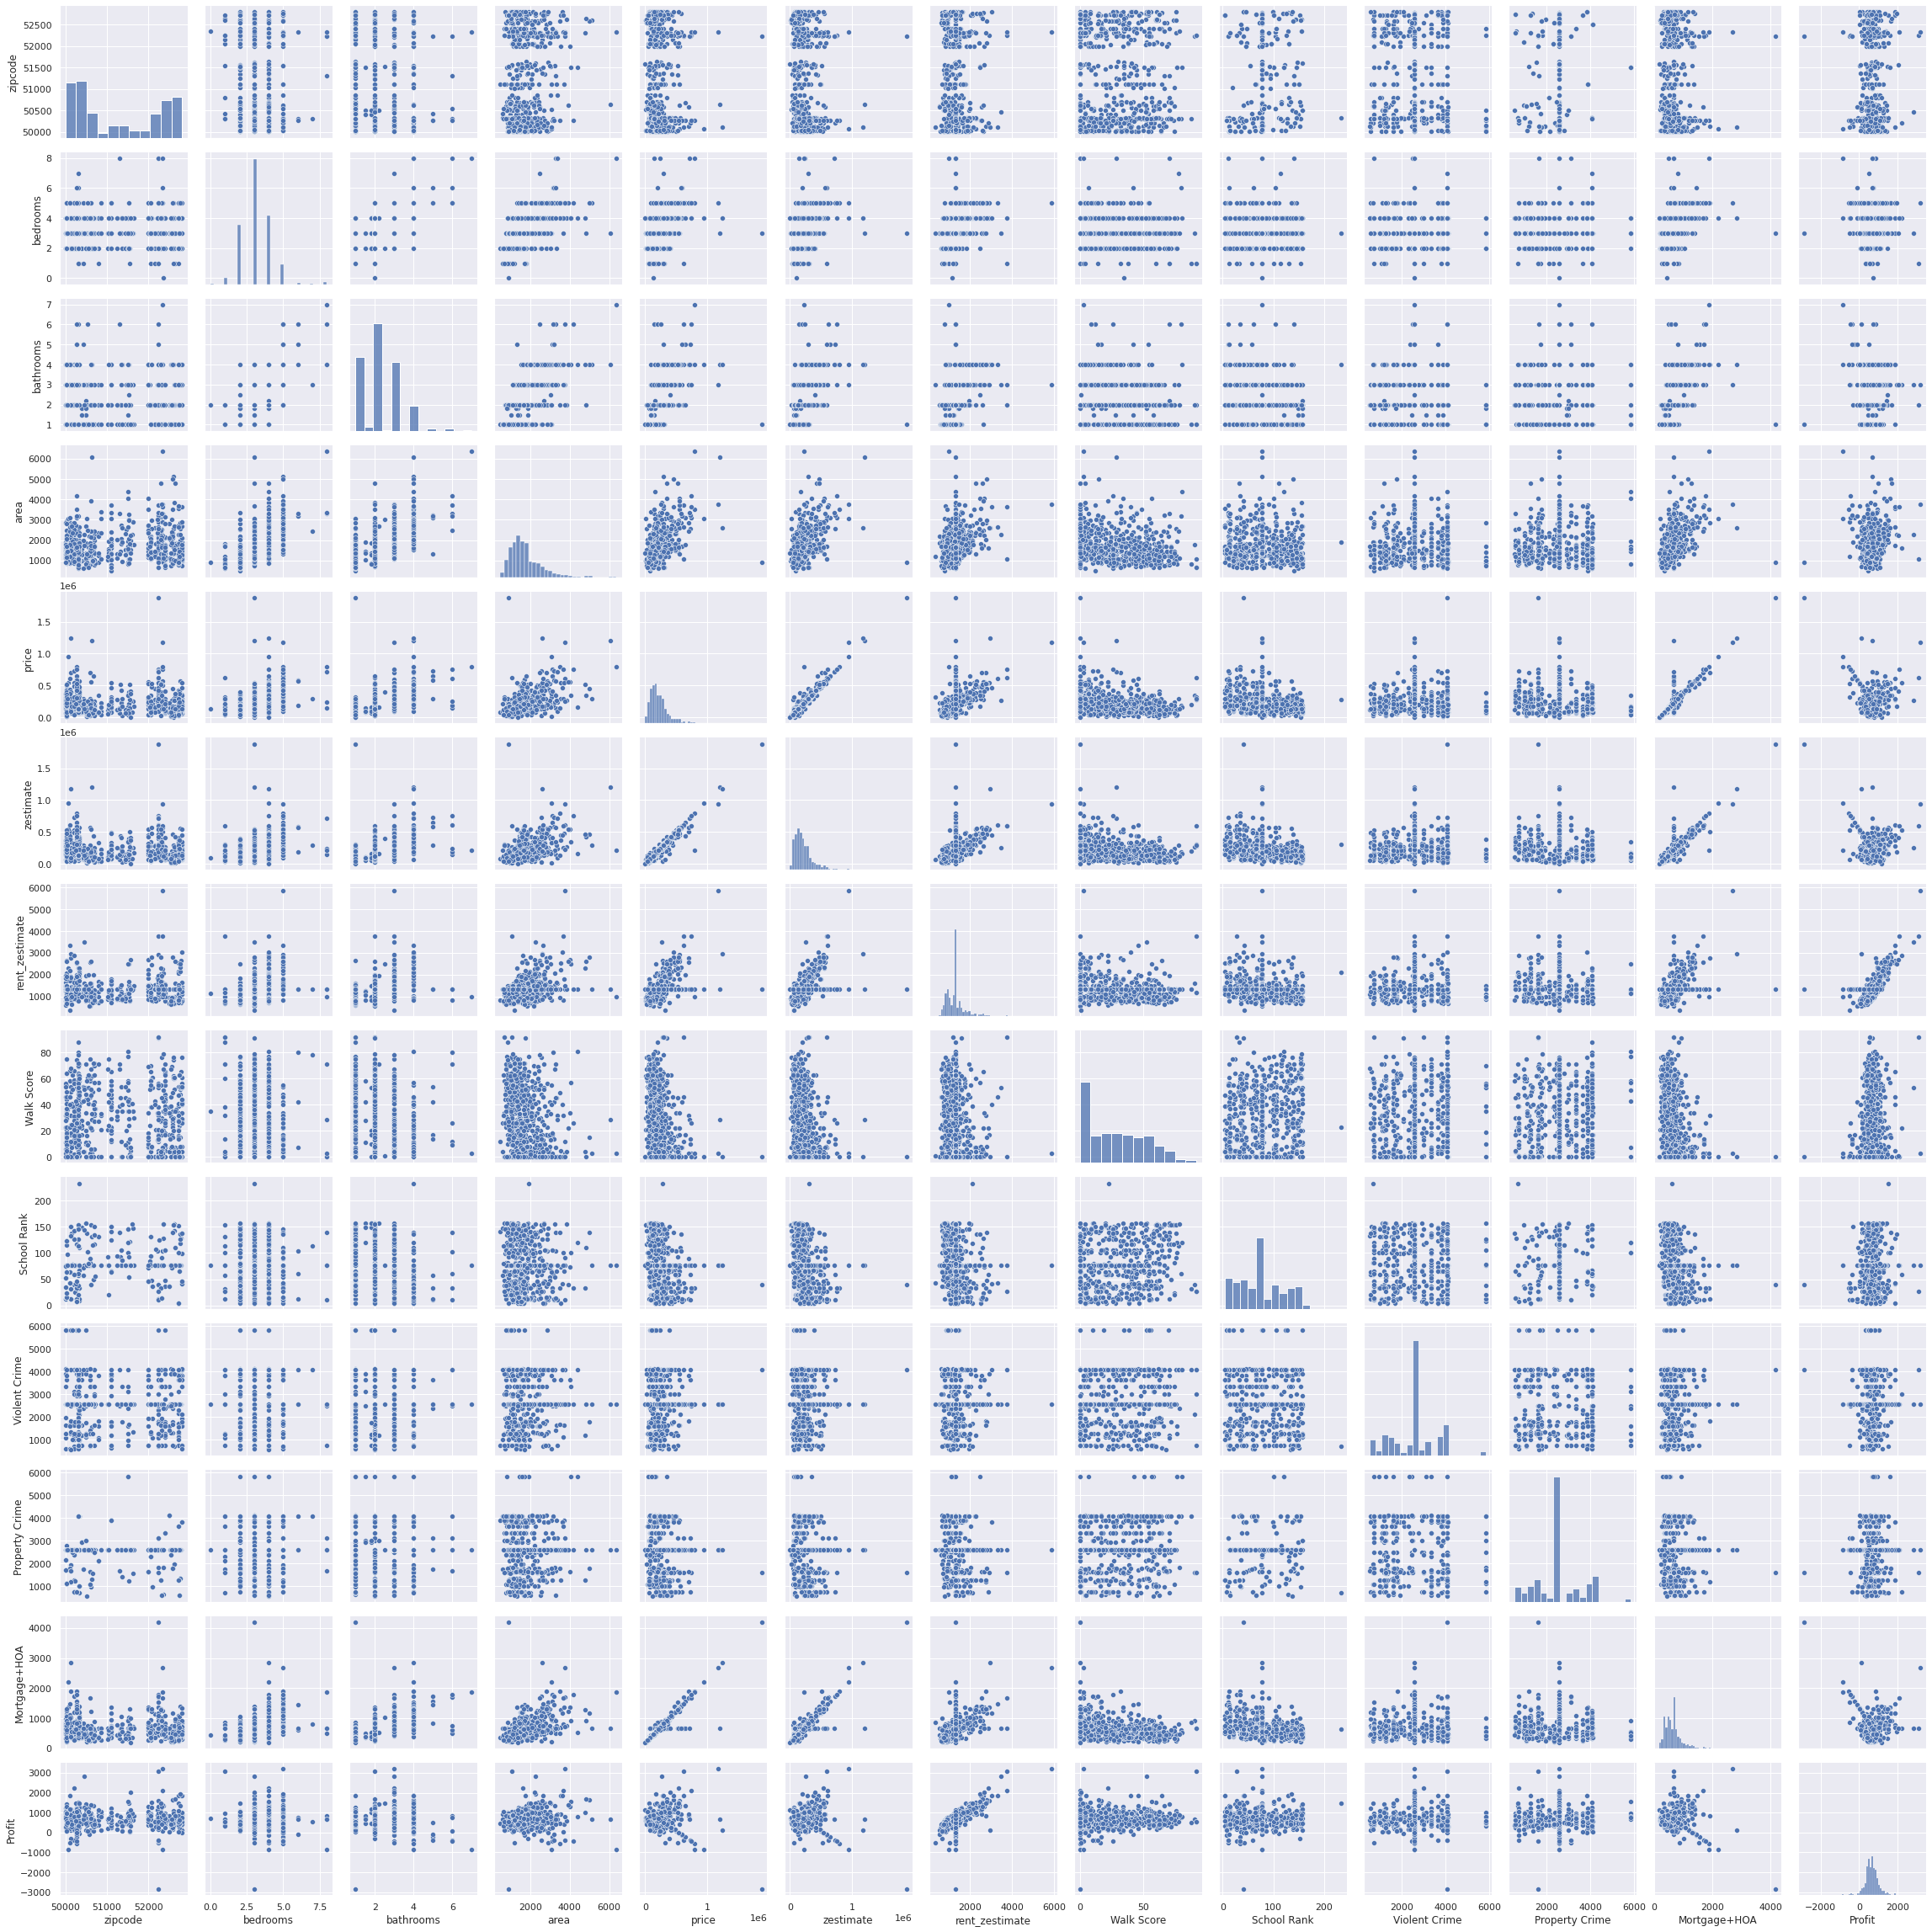

In [30]:
sns.set()
sns.pairplot(final_df, height = 2.5)
plt.show();

## Correlation Coefficients Heatmap

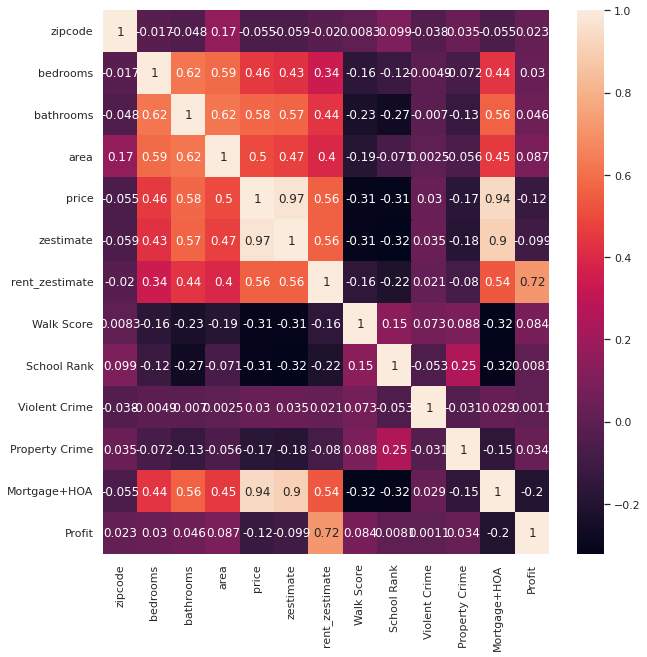

In [31]:
correlation_matrix = final_df.corr()
fig, ax = plt.subplots(figsize=(10,10))         

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

## Feature Importance

In [32]:
y = final_df['price']

[0.07528344 0.05084787 0.04358458 0.07844908 0.13161659 0.09998273
 0.07275946 0.07213433 0.06920653 0.05822676 0.05677775 0.11268264
 0.07844824]


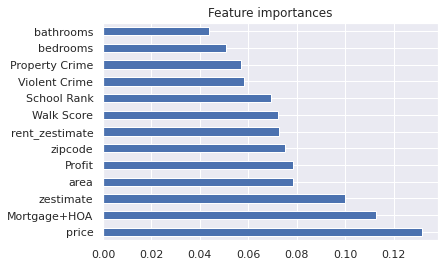

In [33]:
model = ExtraTreesClassifier(criterion='gini') # “gini” for the Gini impurity and “entropy” for the information gain.
model.fit(final_df, y)
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=final_df.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature importances")
plt.show()

Based on the Gini Importance of the features, it's obvious that  price, Mortgage+HOA, area, zestimate and zipcode are the most important factors to predict the loan approval.

# ***k-Means***

## Check Price vs zipcode

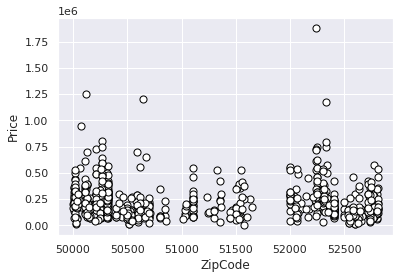

In [34]:
x = final_df.iloc[:,[0,4]].values
plt.scatter(
   x[:, 0], x[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel('ZipCode')
plt.ylabel('Price')
plt.show()

## Elbow method: calculate distortion for a range of number of cluster

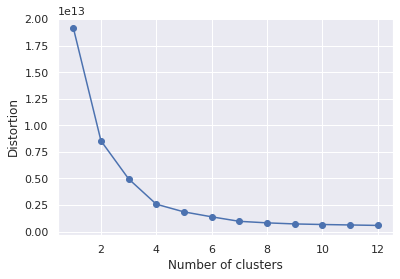

In [35]:
distortions = []
for i in range(1, 13):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 13), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Apply K-Means algorithm

In [36]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)

 ***plot the 3 clusters***

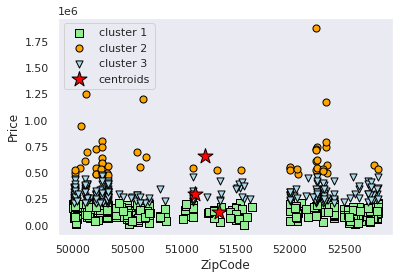

In [37]:

plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 0], x[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('ZipCode')
plt.ylabel('Price')
plt.show()

## Check Rent vs Zestimate

In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         641 non-null    float64
 1   bedrooms        641 non-null    float64
 2   bathrooms       641 non-null    float64
 3   area            641 non-null    float64
 4   price           641 non-null    float64
 5   zestimate       641 non-null    float64
 6   rent_zestimate  641 non-null    float64
 7   Walk Score      641 non-null    float64
 8   School Rank     641 non-null    float64
 9   Violent Crime   641 non-null    float64
 10  Property Crime  641 non-null    float64
 11  Mortgage+HOA    641 non-null    float64
 12  Profit          641 non-null    float64
dtypes: float64(13)
memory usage: 70.1 KB


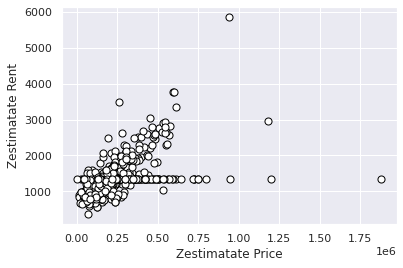

In [39]:
x = final_df.iloc[:,[5,6]].values
plt.scatter(
   x[:, 0], x[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel('Zestimatate Price')
plt.ylabel('Zestimatate Rent')
plt.show()

## Elbow method: Calculate distortion for a range of number of cluster

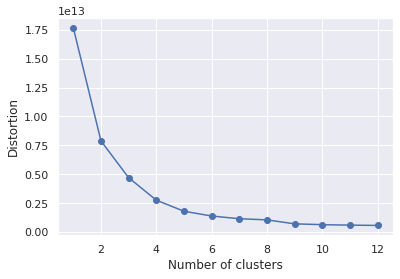

In [40]:
distortions = []
for i in range(1, 13):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 13), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Apply K-Means algorithm

In [41]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)

***plot the 3 clusters***

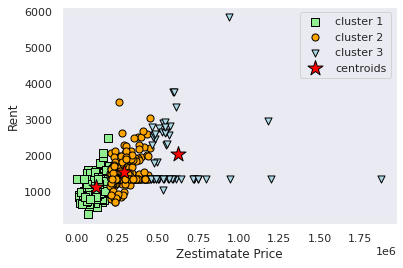

In [42]:

plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 0], x[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('Zestimatate Price')
plt.ylabel('Rent')
plt.show()

## Check School Rank vs Zestimate

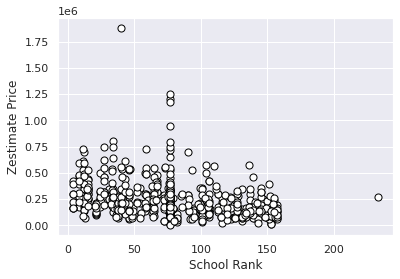

In [43]:
x = final_df.iloc[:,[8,4]].values
plt.scatter(
   x[:, 0], x[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel('School Rank')
plt.ylabel('Zestimate Price')
plt.show()

## Elbow method: calculate distortion for a range of number of cluster

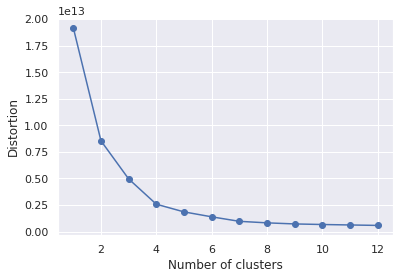

In [44]:
distortions = []
for i in range(1, 13):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 13), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Apply K-Means algorithm

In [45]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)

***plot the 3 clusters***

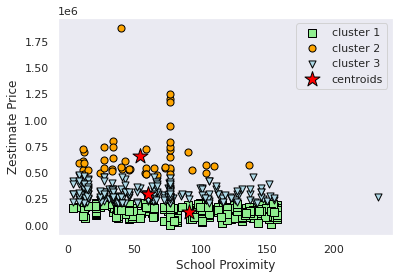

In [46]:

plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 0], x[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('School Proximity')
plt.ylabel('Zestimate Price')
plt.show()

## Check Violent Crime vs Zestimate

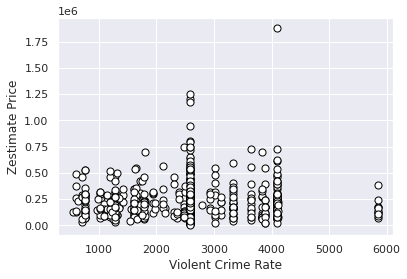

In [47]:
x = final_df.iloc[:,[9,4]].values
plt.scatter(
   x[:, 0], x[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel('Violent Crime Rate')
plt.ylabel('Zestimate Price')
plt.show()

## Elbow method: calculate distortion for a range of number of cluster

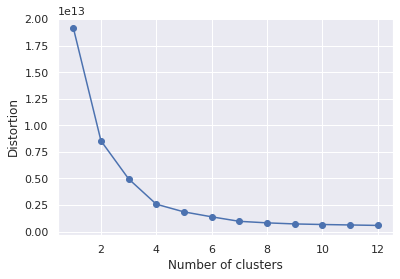

In [48]:
distortions = []
for i in range(1, 13):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 13), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Apply K-Means algorithm

In [49]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)

***plot the 3 clusters***

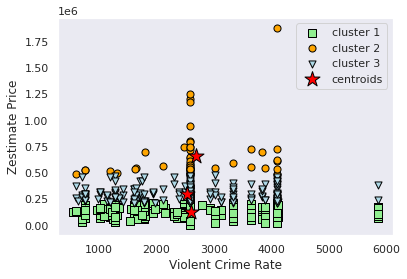

In [50]:

plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 0], x[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('Violent Crime Rate')
plt.ylabel('Zestimate Price')
plt.show()

#Apply Linerar Regression

## Train and Split data

In [51]:
X = final_df[['price', 'bathrooms', 'bedrooms', 'area', 'rent_zestimate', 'zipcode']]
print(X.columns)

Index(['price', 'bathrooms', 'bedrooms', 'area', 'rent_zestimate', 'zipcode'], dtype='object')


Checking the average value of the 'Price' column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


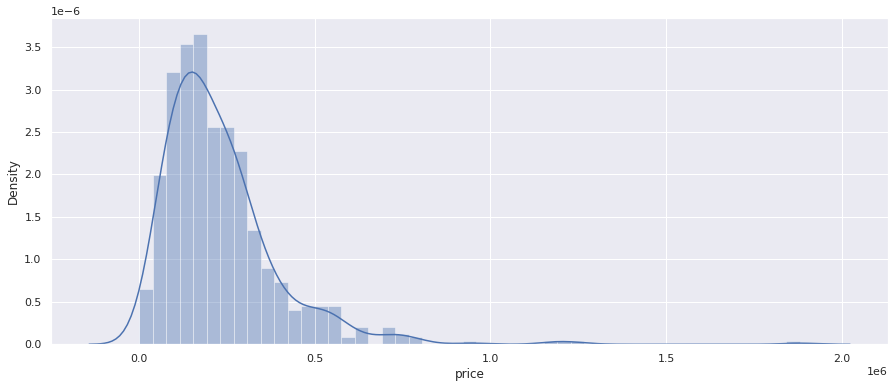

In [52]:
plt.figure(figsize=(15,6))
plt.tight_layout()
seabornInstance.distplot(y)

***Splitting 80% of the data to the training set while 20% of the data to test***

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Training the model

In [54]:
regressor = LinearRegression()

In [55]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 Coefficients our regression model :

In [56]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

Coefficient
price           1.000000e+00
bathrooms       2.781541e-12
bedrooms        7.606248e-13
area           -3.452801e-15
rent_zestimate -9.289578e-16
zipcode         2.197108e-17

***Prediction on test data :***

In [57]:
y_pred = regressor.predict(X_test)

Difference between the actual value and predicted value :

In [58]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(40)
df1.head(30)

Actual  Predicted
122  194900.0  194900.0 
155  31050.0   31050.0  
468  174900.0  174900.0 
103  595875.0  595875.0 
593  363700.0  363700.0 
222  164900.0  164900.0 
231  279000.0  279000.0 
462  274900.0  274900.0 
196  465000.0  465000.0 
523  187000.0  187000.0 
332  87500.0   87500.0  
573  120000.0  120000.0 
480  749900.0  749900.0 
336  24900.0   24900.0  
493  485000.0  485000.0 
362  190000.0  190000.0 
434  265500.0  265500.0 
343  225000.0  225000.0 
570  200000.0  200000.0 
194  255000.0  255000.0 
490  76000.0   76000.0  
379  239500.0  239500.0 
524  291800.0  291800.0 
334  255000.0  255000.0 
157  425000.0  425000.0 
213  69500.0   69500.0  
440  200000.0  200000.0 
484  279900.0  279900.0 
101  84500.0   84500.0  
55   139900.0  139900.0

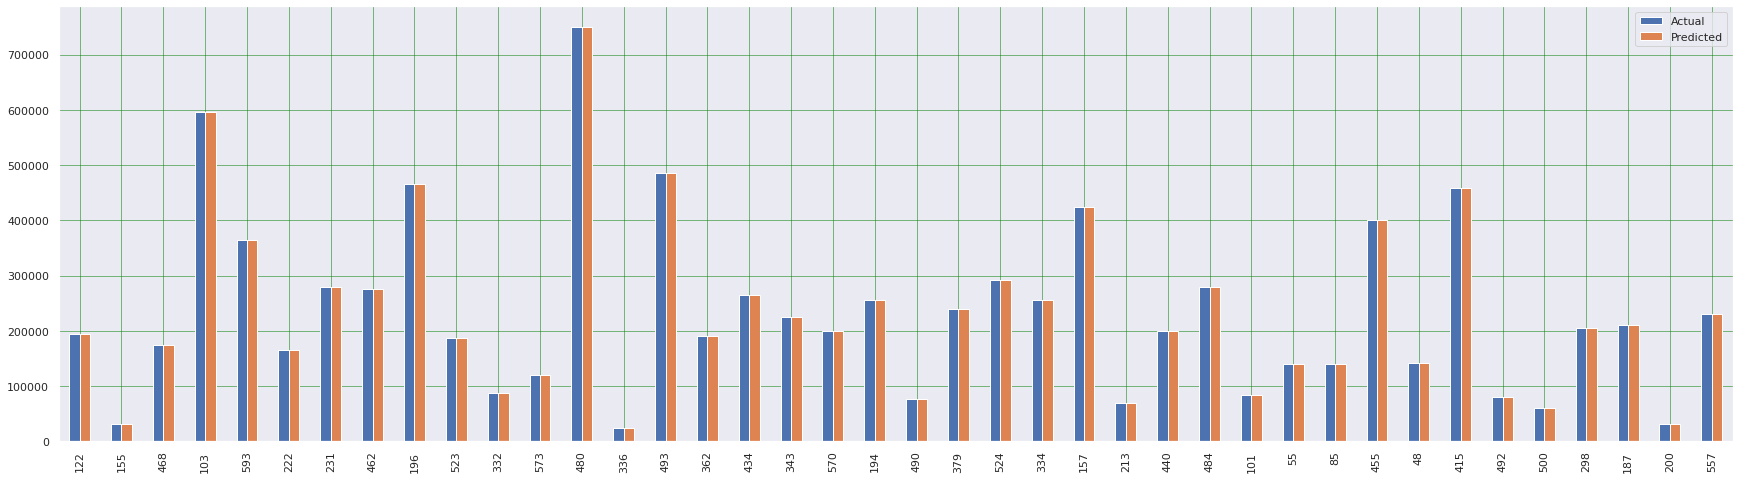

In [59]:
df1.plot(kind='bar',figsize=(30,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [60]:
regressor.score(X, y) 

1.0

In [61]:
r2_score(y_test, y_pred) 

1.0

In [62]:
mean_squared_error(y_test, y_pred) 

1.4236960028626967e-21

***The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE:***

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2902396887263156e-11
Mean Squared Error: 1.4236960028626967e-21
Root Mean Squared Error: 3.773189635921705e-11


#***Possible Latent Variables***
Rent, 
Mortgage+HOA Fees,  
Price,  
School Proximity Rank,  
Zestimate,  
Walk Score,  
Crime Rate

# ***Fractal Clustering on Latent Variables***

## Rent vs Mortgage+HOA

In [64]:
Fractal_df = final_df

In [65]:
Fractal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         641 non-null    float64
 1   bedrooms        641 non-null    float64
 2   bathrooms       641 non-null    float64
 3   area            641 non-null    float64
 4   price           641 non-null    float64
 5   zestimate       641 non-null    float64
 6   rent_zestimate  641 non-null    float64
 7   Walk Score      641 non-null    float64
 8   School Rank     641 non-null    float64
 9   Violent Crime   641 non-null    float64
 10  Property Crime  641 non-null    float64
 11  Mortgage+HOA    641 non-null    float64
 12  Profit          641 non-null    float64
dtypes: float64(13)
memory usage: 70.1 KB


In [66]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[10,9]]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

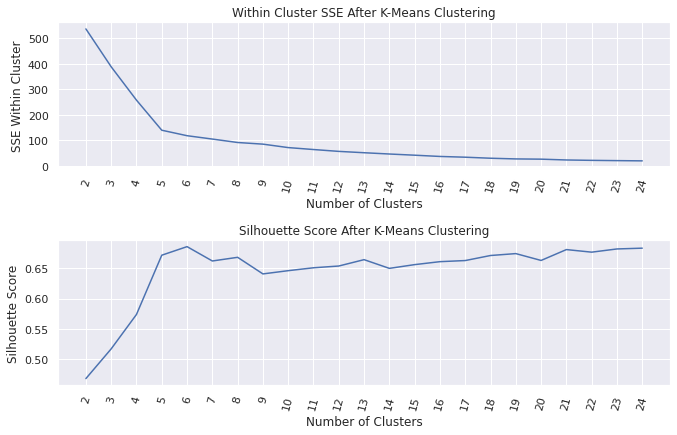

In [67]:
plot_cluster(Fractal_df, max_loop=25)



### First trial With 2 clusters

In [68]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[11,6]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

In [69]:
first_trial = apply_cluster(Fractal_df, clusters=2)

clustering performance
-----------------------------------
silhouette score: 0.55
sse withing cluster: 1064.0


In [70]:

cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"rent_zestimate":"mean", "Mortgage+HOA":"mean"})
    .sort_values('rent_zestimate')
    .reset_index()
)

cluster_perf_df

cluster  rent_zestimate  Mortgage+HOA
0  0        1177.521297     553.904680  
1  1        1970.479510     1132.106269

Choose cluster 0 for fractal clustering as it has maximum profit in terms of (Rent > Mortgage+HOA)

In [71]:
df_sub = Fractal_df.query("cluster == 0").reset_index(drop=True)

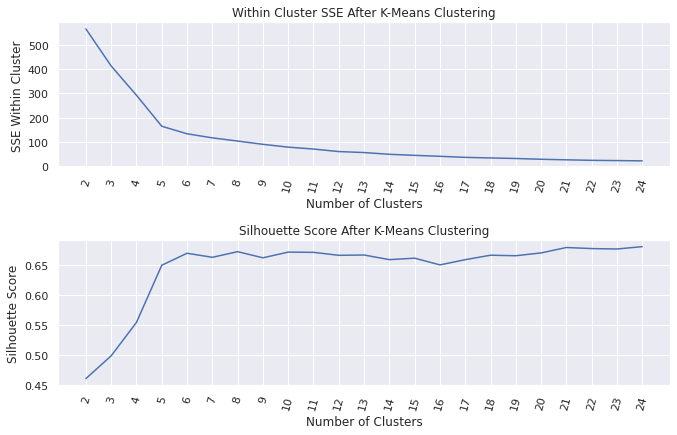

In [72]:
plot_cluster(df_sub, max_loop=25)

### Second trial with 8 clusters

In [73]:
second_trial= apply_cluster(df_sub, clusters=8)

clustering performance
-----------------------------------
silhouette score: 0.43
sse withing cluster: 62.0


In [74]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"rent_zestimate":"mean", "Mortgage+HOA":"mean"})
    .sort_values('rent_zestimate')
    .reset_index()
)

sub_cluster_perf_df

cluster  rent_zestimate  Mortgage+HOA
0  0        833.310345      704.845695  
1  7        844.633333      337.158730  
2  3        1005.837209     483.885548  
3  2        1300.994259     672.282959  
4  6        1310.848124     511.326578  
5  5        1312.089125     330.388839  
6  4        1329.580106     881.643206  
7  1        1579.640000     682.981700

### Golden Cluster

In [75]:
best_sub_cluster = second_trial.query("cluster == 2")

In [76]:
best_sub_cluster

zipcode  bedrooms  bathrooms  ...  Mortgage+HOA      Profit  cluster
3    51510.0  2.0       1.0        ...  666.658500    465.341500  2      
8    51632.0  3.0       3.0        ...  711.014286    621.140048  2      
11   50265.0  4.0       2.0        ...  713.014286    619.140048  2      
14   50312.0  2.0       1.0        ...  666.658500    665.495834  2      
19   52402.0  4.0       3.0        ...  649.014286    700.985714  2      
..       ...  ...       ...        ...         ...           ... ..      
496  52245.0  1.0       1.0        ...  666.658500    528.341500  2      
503  50248.0  3.0       2.0        ...  632.014286    590.985714  2      
504  52722.0  4.0       3.0        ...  737.000000    595.154334  2      
508  52748.0  3.0       2.0        ...  694.014286    638.140048  2      
510  52404.0  3.0       3.0        ...  628.014286    704.140048  2      

[102 rows x 14 columns]

## House price & School proximity rank

In [77]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[4,8]]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

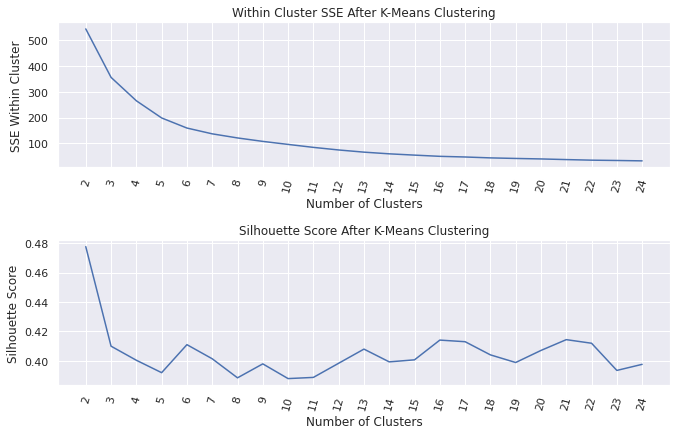

In [78]:
plot_cluster(final_df, max_loop=25)

In [79]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[4,8]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

### First Trial

In [80]:
first_trial = apply_cluster(final_df, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.41
sse withing cluster: 356.0


In [81]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"School Rank":"mean", "price":"mean"})
    .sort_values('price')
    .reset_index()
)

cluster_perf_df

cluster  School Rank          price
0  2        108.281793   134299.161392
1  0        43.947893    260405.436090
2  1        52.912889    630319.949153

In [82]:
df_sub = final_df.query("cluster == 0").reset_index(drop=True)
df_sub

zipcode  bedrooms  bathrooms  ...  Mortgage+HOA      Profit  cluster
0    50677.0  3.0       2.0        ...  533.014286    666.985714  0      
1    50035.0  3.0       2.0        ...  619.000000    69.000000   0      
2    50310.0  2.0       1.0        ...  394.014286    721.985714  0      
3    52246.0  4.0       3.0        ...  1032.014286   931.985714  0      
4    50265.0  3.0       3.0        ...  745.014286    853.985714  0      
..       ...  ...       ...        ...         ...           ... ..      
261  52722.0  4.0       3.0        ...  737.000000    595.154334  0      
262  50035.0  3.0       2.0        ...  619.000000    69.000000   0      
263  52748.0  3.0       2.0        ...  694.014286    638.140048  0      
264  50049.0  3.0       2.0        ...  819.014286    513.140048  0      
265  52245.0  5.0       3.0        ...  1074.014286   258.140048  0      

[266 rows x 14 columns]

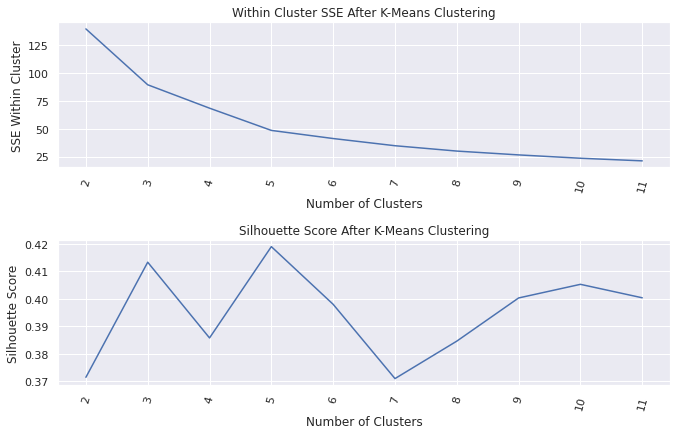

In [83]:
plot_cluster(df_sub, max_loop=12)

### Second Trial

In [84]:
second_trial= apply_cluster(df_sub, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.41
sse withing cluster: 90.0


In [85]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"School Rank":"mean", "price":"mean"})
    .sort_values('price')
    .reset_index()
)

sub_cluster_perf_df

cluster  School Rank          price
0  2        31.842593    187078.240741
1  0        75.392408    296612.022989
2  1        23.830986    327579.577465

### Golden Cluster

In [86]:
best_sub_cluster = second_trial.query("cluster == 0")
best_sub_cluster

zipcode  bedrooms  bathrooms  ...  Mortgage+HOA       Profit  cluster
1    50035.0  3.0       2.0        ...  619.000000    69.000000    0      
13   50324.0  3.0       3.0        ...  813.014286    519.140048   0      
15   50112.0  3.0       3.0        ...  777.014286    221.985714   0      
16   52003.0  3.0       2.0        ...  766.014286    565.985714   0      
33   50211.0  3.0       3.0        ...  666.658500    665.495834   0      
..       ...  ...       ...        ...         ...           ...  ..      
252  51039.0  3.0       4.0        ...  607.014286    690.985714   0      
258  51104.0  3.0       3.0        ...  697.014286    1005.985714  0      
262  50035.0  3.0       2.0        ...  619.000000    69.000000    0      
263  52748.0  3.0       2.0        ...  694.014286    638.140048   0      
264  50049.0  3.0       2.0        ...  819.014286    513.140048   0      

[87 rows x 14 columns]

## Zestimate and max. walk score

### First Trial

In [87]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[5,7]]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

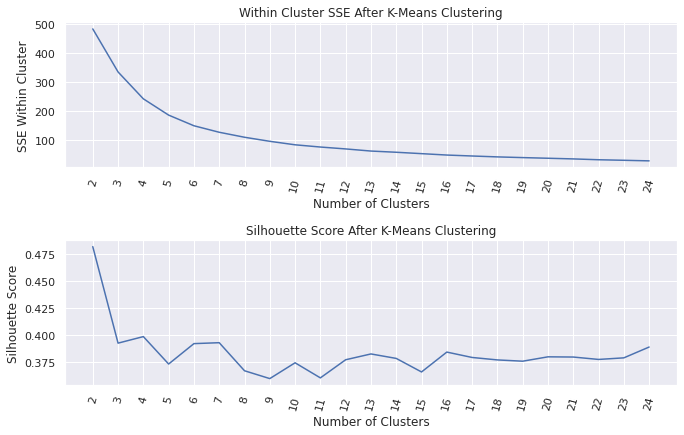

In [88]:
plot_cluster(final_df, max_loop=25)

In [89]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[5,7]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

In [90]:
first_trial = apply_cluster(final_df, clusters=7)

clustering performance
-----------------------------------
silhouette score: 0.39
sse withing cluster: 126.0


In [91]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"Walk Score":"mean", "zestimate":"mean"})
    .sort_values('Walk Score')
    .reset_index()
)

cluster_perf_df

cluster  Walk Score     zestimate
0  3        0.000000    1.881120e+06
1  2        6.693431    2.611887e+05
2  1        11.319811   8.740100e+05
3  6        12.500000   4.780832e+05
4  4        18.199983   1.184785e+05
5  0        46.789474   2.607050e+05
6  5        56.012579   1.093058e+05





Selected cluster 1 as it has best walk score with less list price

### Golden Cluster

In [92]:
df_sub = final_df.query("cluster == 1").reset_index(drop=True)
df_sub

zipcode  bedrooms  bathrooms  ...  Mortgage+HOA       Profit  cluster
0  50644.0  3.0       4.0        ...  666.658500    665.495834   1      
1  50211.0  5.0       4.0        ...  1723.014286  -390.859952   1      
2  52245.0  4.0       3.0        ...  1776.014286  -443.859952   1      
3  52241.0  5.0       5.0        ...  1722.014286  -389.859952   1      
4  52333.0  5.0       3.0        ...  2682.000000   3186.000000  1      
5  50070.0  4.0       4.0        ...  2199.014286  -866.859952   1      
6  50118.0  4.0       4.0        ...  2838.014286   120.985714   1      
7  50265.0  5.0       4.0        ...  1882.014286  -549.859952   1      
8  52241.0  8.0       4.0        ...  666.658500    665.495834   1      
9  50265.0  5.0       6.0        ...  1776.014286  -443.859952   1      

[10 rows x 14 columns]

## Zestimate and crime rate

In [93]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[5,9]]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

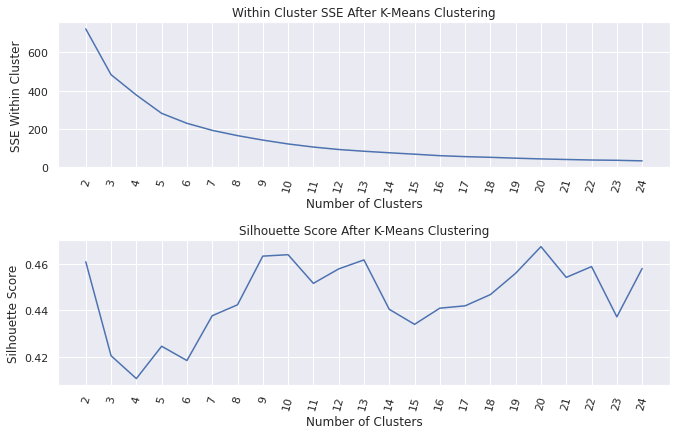

In [94]:
plot_cluster(final_df, max_loop=25)

In [95]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[5,9]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

### First Trial

In [96]:
first_trial = apply_cluster(final_df, clusters=6)

clustering performance
-----------------------------------
silhouette score: 0.42
sse withing cluster: 230.0


In [97]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"Violent Crime":"mean", "zestimate":"mean"})
    .sort_values('zestimate')
    .reset_index()
)

cluster_perf_df

cluster  Violent Crime     zestimate
0  4        2641.101028    1.186994e+05
1  3        1255.078014    1.681846e+05
2  0        4148.621622    1.740547e+05
3  1        2520.306149    2.857036e+05
4  5        2701.836537    5.218061e+05
5  2        2882.550396    1.230284e+06

### Golden Cluster

In [98]:
df_sub = final_df.query("cluster == 1").reset_index(drop=True)
df_sub

zipcode  bedrooms  bathrooms  ...  Mortgage+HOA       Profit  cluster
0    50035.0  3.0       2.0        ...  619.000000    69.000000    1      
1    52246.0  4.0       3.0        ...  1032.014286   931.985714   1      
2    50265.0  3.0       3.0        ...  745.014286    853.985714   1      
3    50265.0  4.0       2.0        ...  713.014286    619.140048   1      
4    50265.0  4.0       3.0        ...  666.658500    1262.341500  1      
..       ...  ...       ...        ...         ...            ... ..      
126  52317.0  4.0       3.0        ...  915.014286    417.140048   1      
127  50248.0  3.0       2.0        ...  632.014286    590.985714   1      
128  50035.0  3.0       2.0        ...  619.000000    69.000000    1      
129  50049.0  3.0       2.0        ...  819.014286    513.140048   1      
130  52245.0  5.0       3.0        ...  1074.014286   258.140048   1      

[131 rows x 14 columns]

# Apply Logistic Regression

In [99]:

final_df['Invest_or_Not'] = np.where(final_df['rent_zestimate']> final_df['Mortgage+HOA'], 1, 0)
final_df

zipcode  bedrooms  bathrooms  ...       Profit  cluster  Invest_or_Not
0    52241.0  4.0       4.0        ... -499.000000   5        0            
1    50677.0  3.0       2.0        ...  666.985714   4        1            
2    50035.0  3.0       2.0        ...  69.000000    1        1            
3    50310.0  2.0       1.0        ...  721.985714   4        1            
4    51510.0  2.0       1.0        ...  465.341500   4        1            
..       ...  ...       ...        ...         ...  ..       ..            
636  51577.0  4.0       1.0        ...  1150.140048  4        1            
637  50702.0  2.0       2.0        ...  397.985714   4        1            
638  52544.0  4.0       1.0        ...  433.985714   4        1            
639  50548.0  2.0       1.0        ...  1061.140048  4        1            
640  52353.0  3.0       2.0        ...  881.985714   4        1            

[641 rows x 15 columns]

In [100]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         641 non-null    float64
 1   bedrooms        641 non-null    float64
 2   bathrooms       641 non-null    float64
 3   area            641 non-null    float64
 4   price           641 non-null    float64
 5   zestimate       641 non-null    float64
 6   rent_zestimate  641 non-null    float64
 7   Walk Score      641 non-null    float64
 8   School Rank     641 non-null    float64
 9   Violent Crime   641 non-null    float64
 10  Property Crime  641 non-null    float64
 11  Mortgage+HOA    641 non-null    float64
 12  Profit          641 non-null    float64
 13  cluster         641 non-null    int32  
 14  Invest_or_Not   641 non-null    int64  
dtypes: float64(13), int32(1), int64(1)
memory usage: 77.6 KB


## Train and Split data

Adding features based on feature Importance

In [101]:
X = final_df[['price','zestimate', 'bathrooms', 'bedrooms', 'area', 'rent_zestimate', 'zipcode']]

Training the model based on target variable 'Invest or Not'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


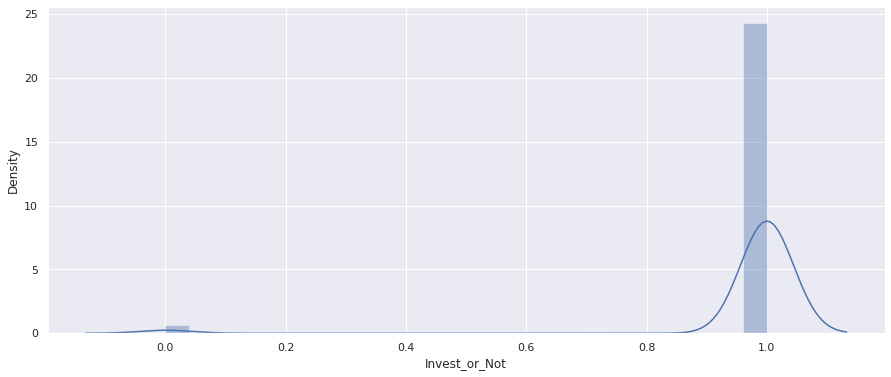

In [102]:
y = final_df['Invest_or_Not']
plt.figure(figsize=(15,6))
plt.tight_layout()
seabornInstance.distplot(y)

 Splitting 80% of the data to the training set while 20% of the data to test

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

## Training the model

In [104]:
regressor = LogisticRegression(random_state=0)  
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
regressor.score(X_train, y_train)

1.0

Prediction on test data :

In [106]:
y_pred = regressor.predict(X_test)

Difference between the actual value and predicted value :

In [107]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(40)
df1.head(30)

Actual  Predicted
124  1       1        
90   1       1        
335  1       1        
631  1       1        
145  1       1        
463  1       1        
550  1       1        
380  1       1        
20   1       1        
158  1       1        
461  1       1        
303  1       1        
12   1       1        
543  1       1        
347  1       1        
300  1       1        
259  1       1        
87   1       1        
477  1       1        
558  1       1        
528  1       1        
474  1       1        
113  1       1        
30   1       1        
45   1       1        
255  1       1        
188  1       1        
436  1       1        
210  1       1        
574  1       1

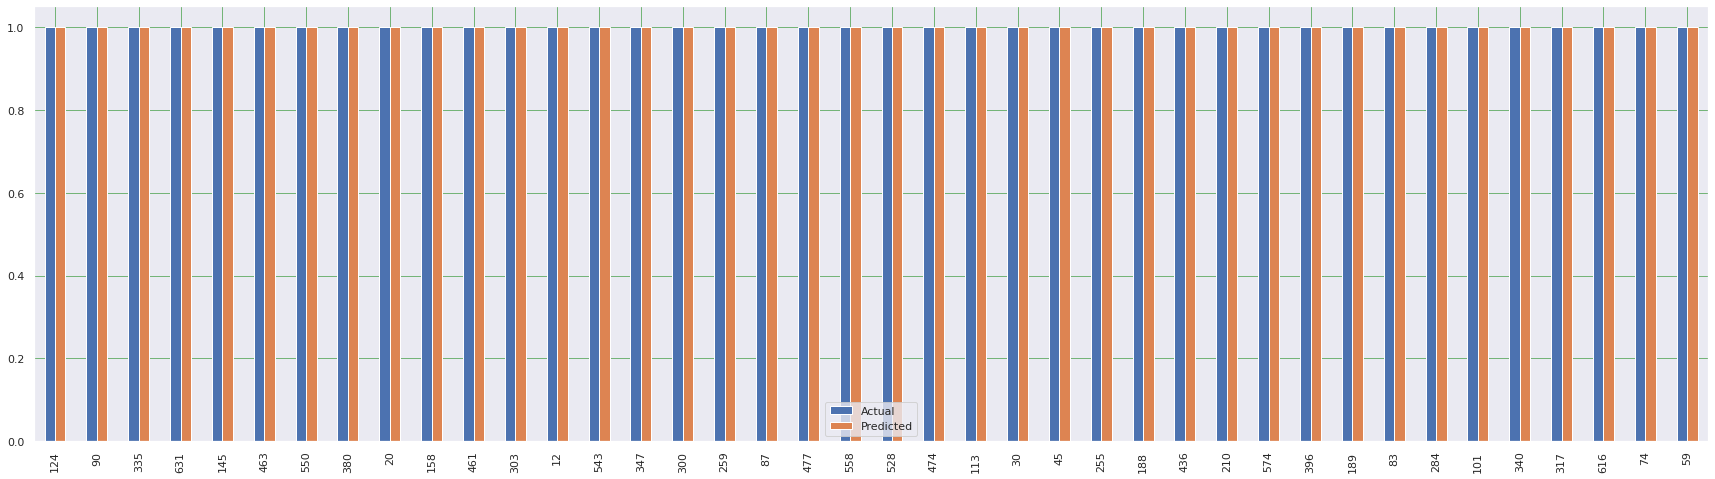

In [108]:
df1.plot(kind='bar',figsize=(30,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [109]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  3   0]
 [  2 124]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.98      0.99       126

    accuracy                           0.98       129
   macro avg       0.80      0.99      0.87       129
weighted avg       0.99      0.98      0.99       129



In [110]:
score = accuracy_score(y_test, y_pred)
print('\nAccuracy score:', score)


Accuracy score: 0.9844961240310077


In [111]:
matrix = confusion_matrix(y_test, y_pred)
print('\nMatrix:', matrix)


Matrix: [[  3   0]
 [  2 124]]


In [112]:

# Plot result from confusion matrix and score
def plot(score, cm):
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(9,9))
  sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
  plt.title(all_sample_title, size = 15);

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  3   0]
 [  2 124]]


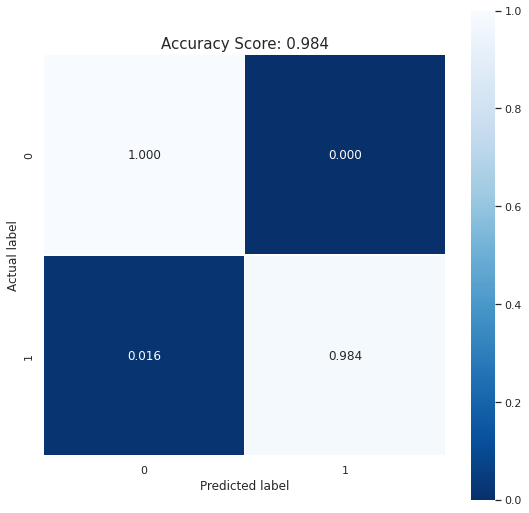

In [113]:
plot(score, cm)

# Apply Muller Loop

In [114]:
final_df['Invest_or_Not'] = np.where(final_df['rent_zestimate']> final_df['Mortgage+HOA'], 1, 0)
final_df

zipcode  bedrooms  bathrooms  ...       Profit  cluster  Invest_or_Not
0    52241.0  4.0       4.0        ... -499.000000   5        0            
1    50677.0  3.0       2.0        ...  666.985714   4        1            
2    50035.0  3.0       2.0        ...  69.000000    1        1            
3    50310.0  2.0       1.0        ...  721.985714   4        1            
4    51510.0  2.0       1.0        ...  465.341500   4        1            
..       ...  ...       ...        ...         ...  ..       ..            
636  51577.0  4.0       1.0        ...  1150.140048  4        1            
637  50702.0  2.0       2.0        ...  397.985714   4        1            
638  52544.0  4.0       1.0        ...  433.985714   4        1            
639  50548.0  2.0       1.0        ...  1061.140048  4        1            
640  52353.0  3.0       2.0        ...  881.985714   4        1            

[641 rows x 15 columns]

In [115]:
final_df.drop(['School Rank','Violent Crime','Property Crime'],axis=1,inplace=True)

In [116]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         641 non-null    float64
 1   bedrooms        641 non-null    float64
 2   bathrooms       641 non-null    float64
 3   area            641 non-null    float64
 4   price           641 non-null    float64
 5   zestimate       641 non-null    float64
 6   rent_zestimate  641 non-null    float64
 7   Walk Score      641 non-null    float64
 8   Mortgage+HOA    641 non-null    float64
 9   Profit          641 non-null    float64
 10  cluster         641 non-null    int32  
 11  Invest_or_Not   641 non-null    int64  
dtypes: float64(10), int32(1), int64(1)
memory usage: 62.6 KB


## Train and Split data

In [285]:
X = final_df[['price','zestimate', 'bathrooms', 'bedrooms', 'area', 'rent_zestimate', 'zipcode','Invest_or_Not']]
y = final_df['Invest_or_Not']

In [257]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           641 non-null    float64
 1   zestimate       641 non-null    float64
 2   bathrooms       641 non-null    float64
 3   bedrooms        641 non-null    float64
 4   area            641 non-null    float64
 5   rent_zestimate  641 non-null    float64
 6   zipcode         641 non-null    float64
dtypes: float64(7)
memory usage: 60.1 KB


## Apply Algorithms in Loop

In [241]:
def apply(X, _regr):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

  # print('X_train\n', X_train.tail(2))

  print('y_train dist\n', y_train.value_counts())
  print('y_test dist\n', y_test.value_counts())

  # Train the model using the training sets
  model = _regr.fit(X_train, y_train)

  # Make predictions using the testing set
  y_pred = _regr.predict(X_test)

  
  unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
  frequencies = np.asarray((unique_elements, counts_elements)).T

  print('y_pred distribution')
  print(frequencies)
  
  return y_test, y_pred, model

## Apply Regression Algorithms in Muller Loop

In [259]:
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import f1_score

In [298]:
from sklearn.metrics import r2_score
def muellerregresssorloop(data, feat):


  kernel = DotProduct() + WhiteKernel()
  names = ["GradientBoostingRegressor","RandomForestRegressor","LinearRegression","SVR","DecisionTreeRegressor","AdaBoostRegressor","GaussianProcessRegressor", "LogisticRegressor"]
  regressors = [GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.01, max_features = feat, max_depth = 5, random_state= 42), RandomForestRegressor(n_estimators=200, max_depth=7,max_features=feat, random_state= 42), LinearRegression(), SVR(kernel='rbf', gamma='auto'), DecisionTreeRegressor(random_state = 0), AdaBoostRegressor(random_state=0, n_estimators=100), GaussianProcessRegressor(kernel=kernel,random_state=0), LogisticRegression()]
  # data.drop(columns ='Invest_or_Not')
  X =  StandardScaler().fit_transform(data.drop(columns ='Invest_or_Not'))
  y = data['Invest_or_Not'].values
  # y
  X_train, X_test_r, y_train, y_test = \
      train_test_split(X, y, test_size=.2)

  # TODO (Apply): All cross-validation

  max_score = 0.0
  max_class = ''
  # iterate over regressors
  for name, clf in zip(names, regressors):
      clf.fit(X_train, y_train)
      score = 100.0 * clf.score(X_test_r, y_test)
      pred = clf.predict(X_train)
      r2 = r2_score(y_train, pred)
      print('R2 SCORE = %.2f,' %(r2))
      print('regressors = %s, Score (test, accuracy) = %.2f,' %(name, score))
      
      if score > max_score:
          reg_best = clf
          max_score = score
          max_class = name

  print(80*'-' )
  print('Best --> regressors = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
  return reg_best
  #plot the output of the various algorithms

In [299]:
feat=7
# final_df.info()
reg_best = muellerregresssorloop(X, feat)


R2 SCORE = 1.00,
regressors = GradientBoostingRegressor, Score (test, accuracy) = -4.49,
R2 SCORE = 0.93,
regressors = RandomForestRegressor, Score (test, accuracy) = 9.62,
R2 SCORE = 0.37,
regressors = LinearRegression, Score (test, accuracy) = 19.69,
R2 SCORE = 0.78,
regressors = SVR, Score (test, accuracy) = 39.25,
R2 SCORE = 1.00,
regressors = DecisionTreeRegressor, Score (test, accuracy) = -2.38,
R2 SCORE = 0.99,
regressors = AdaBoostRegressor, Score (test, accuracy) = -14.08,
R2 SCORE = 0.37,
regressors = GaussianProcessRegressor, Score (test, accuracy) = 19.68,
R2 SCORE = 0.71,
regressors = LogisticRegressor, Score (test, accuracy) = 98.45,
--------------------------------------------------------------------------------
Best --> regressors = LogisticRegressor, Score (test, accuracy) = 98.45


## Apply Classifier Algorithms in Muller loop

In [286]:
def mullerclassifierloop(data):


  names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
          "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
          "Naive Bayes", "QDA"]

  classifiers = [
      KNeighborsClassifier(2),
      SVC(kernel="linear", C=0.025),
      SVC(gamma=2, C=1),
  #     GaussianProcessClassifier(1.0 * RBF(1.0)),
      DecisionTreeClassifier(max_depth=5),
      RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
      MLPClassifier(alpha=1, max_iter=1000),
      AdaBoostClassifier(),
      GaussianNB(),
      QuadraticDiscriminantAnalysis()]

  # X, y = X_data_reshape, y_data

  # X = StandardScaler().fit_transform(X)
  # X_train, X_test, y_train, y_test = \
  #     train_test_split(X, y, test_size=.2)
  X =  StandardScaler().fit_transform(data.drop(columns ='Invest_or_Not'))
  y = data['Invest_or_Not'].values

  X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)


  # X_test
  # TODO (Apply): All cross-validation

  max_score = 0.0
  max_class = ''
  # iterate over classifiers
  for name, clf in zip(names, classifiers):
      clf.fit(X_train, y_train)
      score = 100.0 * clf.score(X_test, y_test)
      pred = clf.predict(X_train)
      # F1 Score matrix
      f1 = f1_score(y_train, pred, average='macro')
      print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
      print('F1 SCORE = %.2f,' %(f1))
      fig, ax = plt.subplots()
      #Confusion matrix
      cm = ConfusionMatrix(clf, classes=[0, 1], ax=ax)
      cm.fit(X_train, y_train)
      cm.score(X_test, y_test)
      cm.poof()


      if score > max_score:
          clf_best = clf
          max_score = score
          max_class = name
  
  print(80*'-' )
  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
  print(80*'-' )
  #plot the output of the various algorithms

In [300]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode         641 non-null    float64
 1   bedrooms        641 non-null    float64
 2   bathrooms       641 non-null    float64
 3   area            641 non-null    float64
 4   price           641 non-null    float64
 5   zestimate       641 non-null    float64
 6   rent_zestimate  641 non-null    float64
 7   Walk Score      641 non-null    float64
 8   Mortgage+HOA    641 non-null    float64
 9   Profit          641 non-null    float64
 10  cluster         641 non-null    int32  
 11  Invest_or_Not   641 non-null    int64  
dtypes: float64(10), int32(1), int64(1)
memory usage: 82.6 KB


Classifier = Nearest Neighbors, Score (test, accuracy) = 96.90,
F1 SCORE = 0.98,


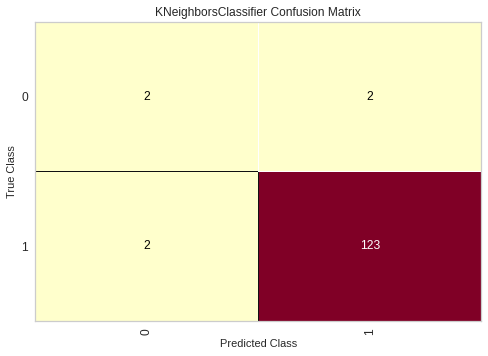

Classifier = Linear SVM, Score (test, accuracy) = 96.90,
F1 SCORE = 0.72,


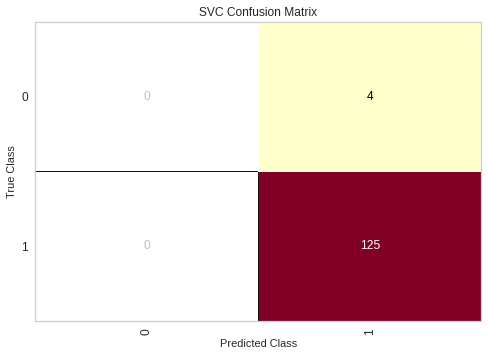

Classifier = RBF SVM, Score (test, accuracy) = 96.90,
F1 SCORE = 1.00,


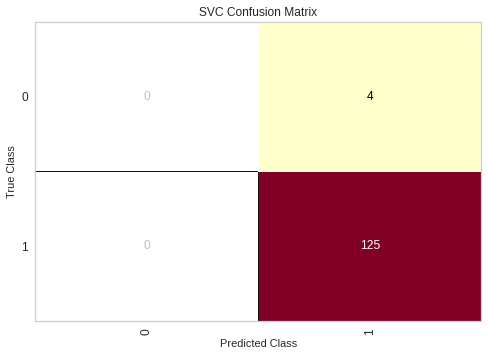

Classifier = Decision Tree, Score (test, accuracy) = 96.12,
F1 SCORE = 0.96,


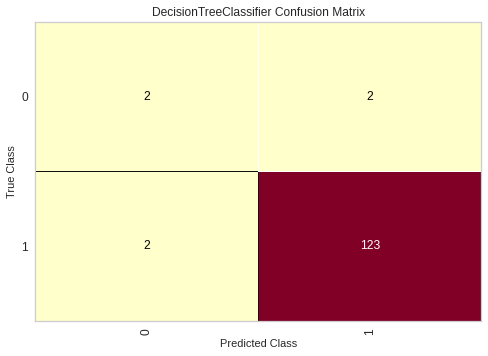

Classifier = Random Forest, Score (test, accuracy) = 96.12,
F1 SCORE = 0.93,


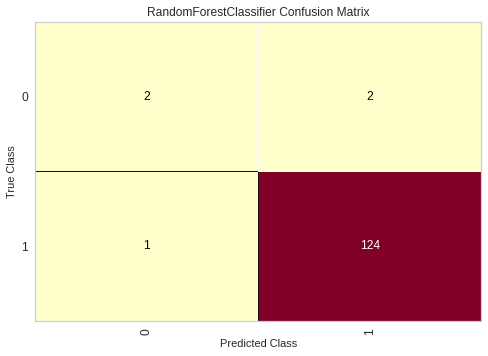

Classifier = Neural Net, Score (test, accuracy) = 97.67,
F1 SCORE = 0.86,


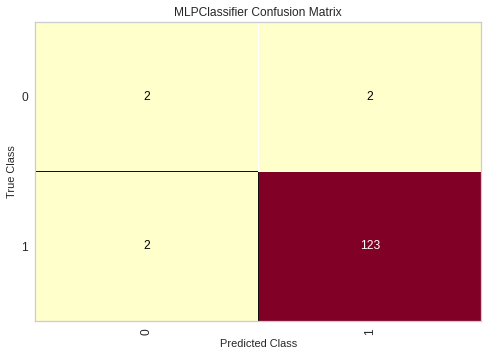

Classifier = AdaBoost, Score (test, accuracy) = 97.67,
F1 SCORE = 1.00,


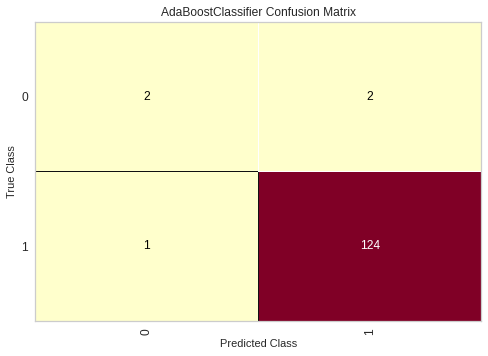

Classifier = Naive Bayes, Score (test, accuracy) = 97.67,
F1 SCORE = 0.82,


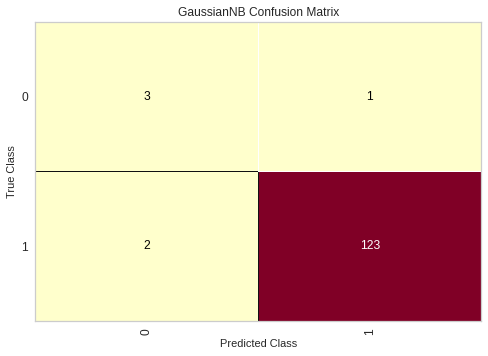

Classifier = QDA, Score (test, accuracy) = 97.67,
F1 SCORE = 0.96,


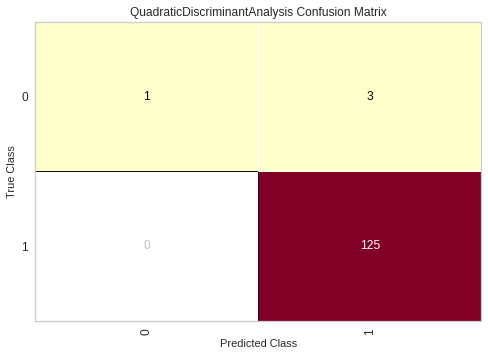

--------------------------------------------------------------------------------
Best --> Classifier = Neural Net, Score (test, accuracy) = 97.67
--------------------------------------------------------------------------------


In [301]:
mullerclassifierloop(X)

# Pickle and load the best classifier



## The Best Model

Please refer to this link for the file of Best Model: 


In [302]:
file = open('shivam-final-model', 'wb')
pickle.dump(reg_best, file)
file.close()

In [304]:
X_test.info()
X_train.info()
X.info()
file = open('shivam-final-model', 'rb')
best_clf = pickle.load(file)
y_pred = best_clf.predict(X_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 124 to 94
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           129 non-null    float64
 1   zestimate       129 non-null    float64
 2   bathrooms       129 non-null    float64
 3   bedrooms        129 non-null    float64
 4   area            129 non-null    float64
 5   rent_zestimate  129 non-null    float64
 6   zipcode         129 non-null    float64
dtypes: float64(7)
memory usage: 8.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 23 to 31
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           512 non-null    float64
 1   zestimate       512 non-null    float64
 2   bathrooms       512 non-null    float64
 3   bedrooms        512 non-null    float64
 4   area            512 non-null    float64
 5   rent_zestimate  512 non-nu

In [305]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  3   0]
 [126   0]]
              precision    recall  f1-score   support

           0       0.02      1.00      0.05         3
           1       0.00      0.00      0.00       126

    accuracy                           0.02       129
   macro avg       0.01      0.50      0.02       129
weighted avg       0.00      0.02      0.00       129



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [306]:
score = accuracy_score(y_test, y_pred)
print('\nAccuracy score:', score)


Accuracy score: 0.023255813953488372


# Confusion Matrix

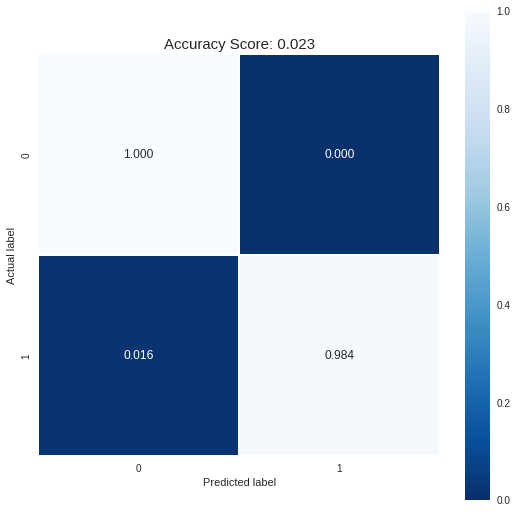

In [307]:
plot(score, cm)

# Variance

### Check variance in prediction quality

In [308]:
scores = cross_val_score(best_clf, X, y, cv=RepeatedKFold(n_repeats=CV_N_REPEATS), n_jobs=-1)
scores_est = scores.copy()
print(f"Scores mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)")

Scores mean=0.99 +/- 0.01 (1 s.d.)


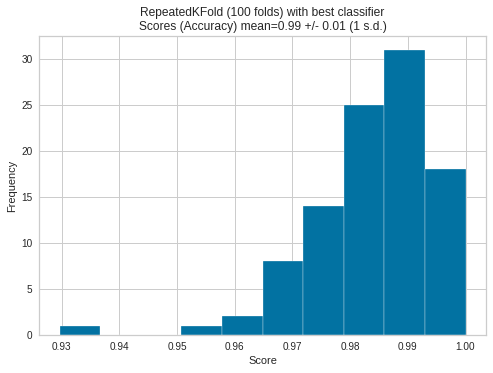

In [309]:
score_line = f"Scores (Accuracy) mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)"
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=BINS)
ax.set_title(f"RepeatedKFold ({len(scores)} folds) with best classifier\n" + score_line);
ax.set_xlabel("Score")
ax.set_ylabel("Frequency");

# Conclusion/Summary

**Business Case**
 * Provide knowledge to an investor or buyers, whether to invest in a housing porperty or not.   
 * This decison has to be taken by considering various features such as, Selling Price of the property, Zestimate Price, Proximity Ranking to various Schools, Crime Rate in the area, Walk Score etc.

1) Data narrative: Using IOWA Dataset given by the professor, I performed Data cleaning, data preparation and eliminated unwanted columns and considered only the required features such as, address, zipcode, area, bedrooms, bathrooms, year built, price, zesitmate, zestimate rent.
Apart from this data, I scrapped serveral addtional dataset from above mentioned websites to enrich the intial dataset, amalgamate it and improve the feature set and visualization of deduce the best model.

2) ***Visualizations:***  
- Performed Visualizations of data preparation using First, Second and Third Data Enrichment.

- Calculated Feature importance, gini score.

2) **Web Scraping**: I scrapped serveral addtional dataset from above mentioned websites to enrich the intial dataset, amalgamate it and improve the feature set and visualization of deduce the best model.  
Final Scrapped Dataset file store in drive is 'shivam_final_scrapped_data.csv'.  

Zillow: https://www.zillow.com  
Walk Score: https://www.walkscore.com   
School Proximity Rank: https://www.niche.com/places-to-live/z/  
Crime rates: https://247wallst.com/city/  

3) ***Data Preparaion***    
Peformed Feature transformation: Transform features  and add new features to dataset via amalgamations   


4) ***Data Distribution*** Did Dimensionality Reduction via PCA      
 - Implement 3 amalgamations:    
First dataset Enrichment     
Second data Enrichment    
Third data enrichment

5.) Perfomred the ***First, Second and Third Data Enrichment*** by mering Zellow data, Walk Score Data, School Rank Data and Crime rates data into the Housing dataset in DataFrame itself.
Link to Scrapped Dataset:  https://drive.google.com/file/d/1pFhkGNJbM1Eah3qxyZDZvUTUprYXf_Va/view?usp=sharing   
IOWA Dataset Link: https://drive.google.com/file/d/1h6jeu_81VLLa3qXSyzmlUw_ub6ia8Q2E/view?usp=sharing     

6) **Feature Transformation**: Cleaned the final dataset and scrapped dataset, perfomred feature transformation by checking null values, lable encoding, and store in dataframe for further processing. 

7) **Feature Importance**: With the help of Correlation Coefficient Heatmap and gini score, I deduced House price, Mortgage+HOA, Zestimate Price, area, zestimate rent, zipcode, crime rate, school proximity rank and, WalkScore as the most important features from the final dataset.

8) **Clustering** : Used ScikitLearn K-Means clustring for the dataset. To observe the dataset, Created clusters for the various feature combinations. Below mentioned are my observations:

9) ***Observations from above***
- ***Rent and HOA+Mortgage Fees***: Profit on House rent deducting the HOA + Mortgage fees seems to be a good factor on deciding the profitable investment scope. Houses with more rent and low HOA+Mortgage Fees tend to have high price but high profit.   
- ***House Price and zipcode***: Zipcodes have various properties ranging from lowest to highest price.
- ***zestimate rent and zestimate price***: Properties having less zestimate price have the low rent and properties having the high zestimate price have high rent.
- ***School Proximity Rank as Zestimate price***: Properties with high nearby Schools ranking have high property prices and properties nearby schools with low rank have less prices. 
- ***Crime rate and Zestimate price***: Properties in areas with Higher crime rates have the lower zestimate price and properties in areas with lower crime rate have the lower zestimate price. 

10) **Linear Regression**: To predict the actual and predicted average house prices for the house, trained and split the final data set(80:20) with the important features and then first perfomred Linear regression seprartely to predict the house price. This was done by trainning the model based on the final housing dataset. 

11) **Fractal Clustering**: To suggest a suitale property for an investor to invest on or not, I perfomred Fractal Clutering on various feature combinations

- ***Rent vs Mortgage+HOA***: The cluster 2 is the goldern cluster where Rent is greater Mortage price and HOA having the difference in the best price range.
- ***House Price and Best School Proximity Rank***: The cluster 0 is the golden cluster where property price is lower and school proximity rank is highest. Most of the houses have 2 or more bedrroms and bath, suitable for a family with kids.
- ***Zestimate price and maximum Walk Score***: Found the cluster 1 as the golden cluster having the maximum walk score for the moderate price.
- ***Zestimate price and crime Score***: Found the cluster 1 as the golden cluster having the lowest crime rate and lower housing prices that would interest the invester to a property.

12) **Latent Variables**: Deduced Walk Ccore, Crime Rate and School Rank, Profit = Rent - (Mortgage+HOA fees)  as the latent variables.

13) **Logistic Regression** : A good investment properties have a positive rental income every month after deducting (Mortgage+HOA fees). Thus, I perfomed Logistic Regression and created a new feature in the final datafram as 'Invest_or_Not' based on the value where Rent > Mortgage + HOA, which means we get a profit in our rent is much greater than (Mortgage+HOA fees). After training and predicting the model, I got the accuracy of 98%.
Thus, it means most of the properties avialbale in provided IOWA dataset is ideal for an investor to make an investment.

14) **Muller Loop**: I performed Muller Loop to get the best Classifier and Regressor among below to get the best accuracy of the model to help find the properties to invest on.   
***Classifier:***  
"Nearest Neighbors",  
"Linear SVM",  
"RBF SVM",  
"Decision Tree",  
"Random Forest",  
"Neural Net",  
"AdaBoost",  
"Naive Bayes",  
"QDA"  

***Regression:***
"GradientBoostingRegressor",  
"RandomForestRegressor",  
"LinearRegression",  
"SVR",  
"DecisionTreeRegressor",  
"AdaBoostRegressor",  
"GaussianProcessRegressor",   
"LogisticRegressor"  


I found that the accuracy score for the algorithms fluctuate ranging from 90% to 98%. The more I trained the model, the accuracy was getting increased sharply.   

15) ***Pickle and Load*** Prepared a model to load the best model for future reference. 
Link best model:  https://drive.google.com/file/d/1QX2mTAidlTOtXu2w3mP6Xe72aKIJi4GB/view?usp=sharing 

16) Build Confusion Matrix and checked Variance in prediction quality 